### How to deal with missing values in dataframe
1. Categorical (text) - Need to replace by mode
2. Continuous (number) - Replace by either mean or mode

In [3]:
# Ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

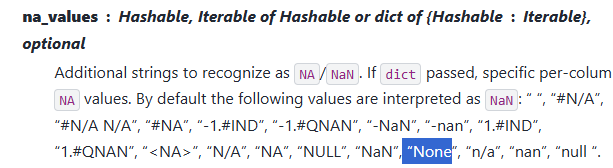

In [6]:
path = r"C:\ETLHive lectures by me\Datasets\Cars93.csv"
print(path)

C:\ETLHive lectures by me\Datasets\Cars93.csv


In [12]:
# Below method should be used only on Cars93 dataset
import pandas as pd
df = pd.read_csv(path, na_values=["", "NA"], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Check the number of missing values in dataframe

In [15]:
m = df.isna().sum()

In [17]:
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [19]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [23]:
fil = df["AirBags"].isna()
df[fil]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
21,22,Chrysler,Imperial,Large,29.5,29.5,29.5,20,26,NaN,...,6,203,110,69,44,36.0,17.0,3570,USA,Chrysler Imperial
45,46,Hyundai,Scoupe,Sporty,9.1,10.0,11.0,26,34,NaN,...,4,166,94,64,34,23.5,9.0,2285,non-USA,Hyundai Scoupe
51,52,Lincoln,Town_Car,Large,34.4,36.1,37.8,18,26,NaN,...,6,219,117,77,45,31.5,22.0,4055,USA,Lincoln Town_Car


### NaN - Not a Number missing values in dataframe

In [26]:
fil = df["Rear.seat.room"].isna()
df[fil]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
18,19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,...,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
56,57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7


In [28]:
fil = df["Luggage.room"].isna()
df[fil]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
15,16,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
16,17,Chevrolet,Astro,Van,14.7,16.6,18.6,15,20,None,...,8,194,111,78,42,33.5,NaN,4025,USA,Chevrolet Astro
18,19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,...,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
25,26,Dodge,Caravan,Van,13.6,19.0,24.4,17,21,Driver only,...,7,175,112,72,42,26.5,NaN,3705,USA,Dodge Caravan
35,36,Ford,Aerostar,Van,14.5,19.9,25.3,15,20,Driver only,...,7,176,119,72,45,30.0,NaN,3735,USA,Ford Aerostar
55,56,Mazda,MPV,Van,16.6,19.1,21.7,18,24,None,...,7,190,110,72,39,27.5,NaN,3735,non-USA,Mazda MPV
56,57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7
65,66,Nissan,Quest,Van,16.7,19.1,21.5,17,23,None,...,7,190,112,74,41,27.0,NaN,4100,non-USA,Nissan Quest
69,70,Oldsmobile,Silhouette,Van,19.5,19.5,19.5,18,23,None,...,7,194,110,74,44,30.5,NaN,3715,USA,Oldsmobile Silhouette
86,87,Toyota,Previa,Van,18.9,22.7,26.6,18,22,Driver only,...,7,187,113,71,41,35.0,NaN,3785,non-USA,Toyota Previa


### Filling the missing values
1. categorical - Mode (most frequently occuring data)
2. continuos (numerical) - Median, Mean

In [31]:
df["AirBags"].mode()

0    Driver only
Name: AirBags, dtype: object

In [33]:
df["AirBags"].value_counts()

AirBags
Driver only           42
None                  33
Driver & Passenger    14
Name: count, dtype: int64

In [35]:
df["AirBags"].mode()[0]

'Driver only'

In [37]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [39]:
df["Rear.seat.room"].mean()

27.82967032967033

In [41]:
df["Rear.seat.room"].median()

27.5

In [43]:
df["Luggage.room"].mean()

13.890243902439025

In [45]:
df["Luggage.room"].median()

14.0

In [49]:
mode = df["AirBags"].mode()[0]
mode

'Driver only'

### Use df.fillna(value) function to replace missing values

In [52]:
df["AirBags"] = df["AirBags"].fillna(mode)

In [54]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [56]:
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Seperating categorical and continuous features

In [59]:
df.dtypes

id                      int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [61]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [67]:
cat = list(df.columns[df.dtypes == "object"])
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [69]:
con = list(df.columns[df.dtypes != "object"])
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [75]:
for col in df.columns:
    print(col)

id
Manufacturer
Model
Type
Min.Price
Price
Max.Price
MPG.city
MPG.highway
AirBags
DriveTrain
Cylinders
EngineSize
Horsepower
RPM
Rev.per.mile
Man.trans.avail
Fuel.tank.capacity
Passengers
Length
Wheelbase
Width
Turn.circle
Rear.seat.room
Luggage.room
Weight
Origin
Make


In [79]:
def replacer(df: pd.DataFrame):
    # Get all categorical features
    cat = list(df.columns[df.dtypes == "object"])
    
    # Iterate through all columns and replace missing values
    for col in df.columns:
        if col in cat:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)

In [81]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [83]:
replacer(df)

In [85]:
df.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [90]:
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Saving the clean file to csv

In [94]:
# Change the folder (copy your folder path with shift + right click)
import os
os.chdir(r"C:\Data")

In [96]:
df

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.000000,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.000000,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.000000,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,6,193,106,70,37,31.0,17.000000,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.000000,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,13.890244,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.000000,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.000000,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.000000,2985,non-USA,Volvo 240


In [98]:
df.to_csv("CarsClean.csv", index=False)

# Joins
pd.merge()

In [102]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
path2 = r"C:\ETLHive lectures by me\Datasets\emp_dept.xlsx"
print(path2)

C:\ETLHive lectures by me\Datasets\emp_dept.xlsx


In [106]:
emp = pd.read_excel(path2, sheet_name="emp")
emp

,empid,fn,ln,sal,did
0,101,Naman,Singh,5000,20
1,102,Raman,Tripathi,7000,20
2,103,Chaman,Nagor,8000,20
3,104,Nisha,Patil,9000,30
4,105,Madhu,Reddy,10000,30
5,106,Rahul,Barkade,122746,113


In [108]:
dept = pd.read_excel(path2, sheet_name="dept")
dept

,dept_id,dname
0,10,HR
1,20,MKT
2,30,SAL
3,40,ADM
4,50,FIN
5,60,ACC


### Types of joins
1. inner - only common values from reference columns of left and right table will be shown
2. left - all the values including common from left table will be shown
3. right - all the values including common from right table will be show
4. full outer - Values from both left and right table including common values will be considered

In [111]:
inner = pd.merge(
    left = emp,
    right= dept,
    how = "inner",
    left_on= "did",
    right_on = "dept_id"
)
inner

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20,MKT
1,102,Raman,Tripathi,7000,20,20,MKT
2,103,Chaman,Nagor,8000,20,20,MKT
3,104,Nisha,Patil,9000,30,30,SAL
4,105,Madhu,Reddy,10000,30,30,SAL


In [113]:
inner[["empid", "fn", "ln", "did", "dname"]]

,empid,fn,ln,did,dname
0,101,Naman,Singh,20,MKT
1,102,Raman,Tripathi,20,MKT
2,103,Chaman,Nagor,20,MKT
3,104,Nisha,Patil,30,SAL
4,105,Madhu,Reddy,30,SAL


### Get the avg salary be dname

In [116]:
inner.groupby(by="dname") \
    .agg({"sal":"mean"})

,sal
dname,
MKT,6666.666667
SAL,9500.000000


### Left Join

In [119]:
left = pd.merge(
    left = emp,
    right = dept,
    how = "left",
    left_on= "did",
    right_on = "dept_id"
)
left

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20.0,MKT
1,102,Raman,Tripathi,7000,20,20.0,MKT
2,103,Chaman,Nagor,8000,20,20.0,MKT
3,104,Nisha,Patil,9000,30,30.0,SAL
4,105,Madhu,Reddy,10000,30,30.0,SAL
5,106,Rahul,Barkade,122746,113,NaN,NaN


### Right Join

In [122]:
right = pd.merge(
    left = emp,
    right = dept,
    how = "right",
    left_on= "did",
    right_on = "dept_id"
)
right

,empid,fn,ln,sal,did,dept_id,dname
0,NaN,NaN,NaN,NaN,NaN,10,HR
1,101.0,Naman,Singh,5000.0,20.0,20,MKT
2,102.0,Raman,Tripathi,7000.0,20.0,20,MKT
3,103.0,Chaman,Nagor,8000.0,20.0,20,MKT
4,104.0,Nisha,Patil,9000.0,30.0,30,SAL
5,105.0,Madhu,Reddy,10000.0,30.0,30,SAL
6,NaN,NaN,NaN,NaN,NaN,40,ADM
7,NaN,NaN,NaN,NaN,NaN,50,FIN
8,NaN,NaN,NaN,NaN,NaN,60,ACC


### Full Outer

In [125]:
outer = pd.merge(
    left = emp,
    right = dept,
    how = "outer",
    left_on= "did",
    right_on = "dept_id"
)
outer

,empid,fn,ln,sal,did,dept_id,dname
0,NaN,NaN,NaN,NaN,NaN,10.0,HR
1,101.0,Naman,Singh,5000.0,20.0,20.0,MKT
2,102.0,Raman,Tripathi,7000.0,20.0,20.0,MKT
3,103.0,Chaman,Nagor,8000.0,20.0,20.0,MKT
4,104.0,Nisha,Patil,9000.0,30.0,30.0,SAL
5,105.0,Madhu,Reddy,10000.0,30.0,30.0,SAL
6,NaN,NaN,NaN,NaN,NaN,40.0,ADM
7,NaN,NaN,NaN,NaN,NaN,50.0,FIN
8,NaN,NaN,NaN,NaN,NaN,60.0,ACC
9,106.0,Rahul,Barkade,122746.0,113.0,NaN,NaN
